<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   520 non-null    float64
 1   Role                 520 non-null    object 
 2   Experience_Years     520 non-null    float64
 3   Cyber_Training       520 non-null    object 
 4   Last_Training_Year   520 non-null    float64
 5   Faced_Cyber_Attack   520 non-null    object 
 6   Attack_Type          520 non-null    object 
 7   Affected_Department  520 non-null    object 
 8   Downtime_Hours       520 non-null    float64
 9   Framework_Used       420 non-null    object 
 10  GDPR_Impact          520 non-null    float64
 11  Preparedness_Level   520 non-null    float64
dtypes: float64(6), object(6)
memory usage: 48.9+ KB
None
ID                     0
Role                   0
Experience_Years       0
Cyber_Training         0
Last_Training_Year     0
Faced_Cyber_

<ipython-input-8-b4e82103be4f>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-8-b4e82103be4f>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_count.index, y=training_count.values, palette='Blues_d')


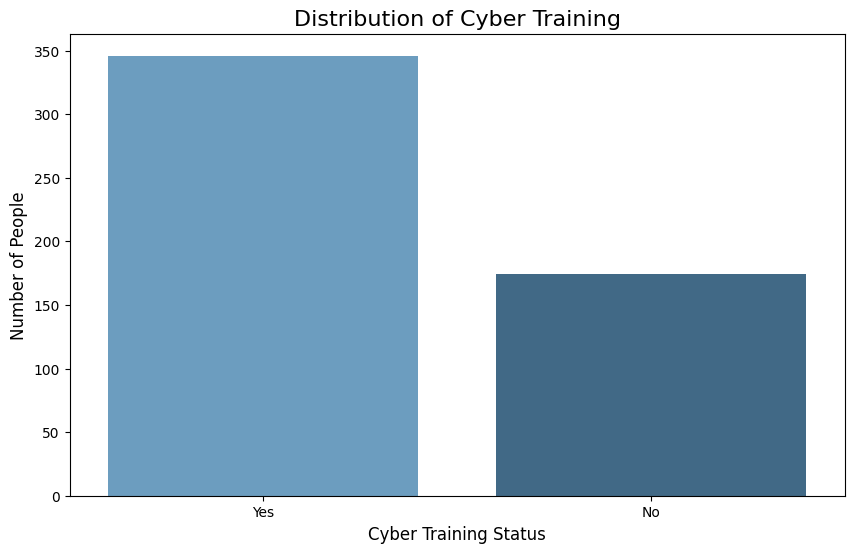

<ipython-input-8-b4e82103be4f>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attack_Type', y='Downtime_Hours', data=data, palette='Set2')


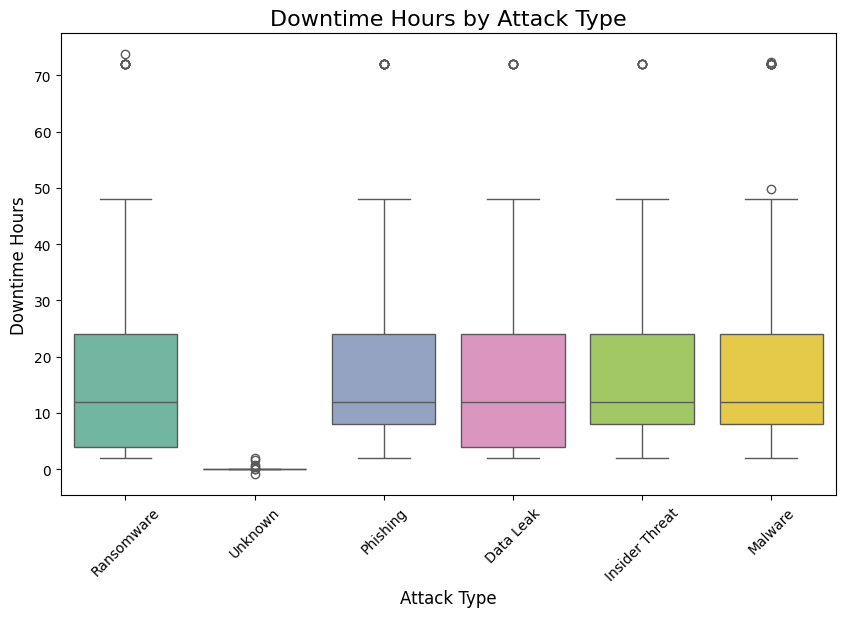

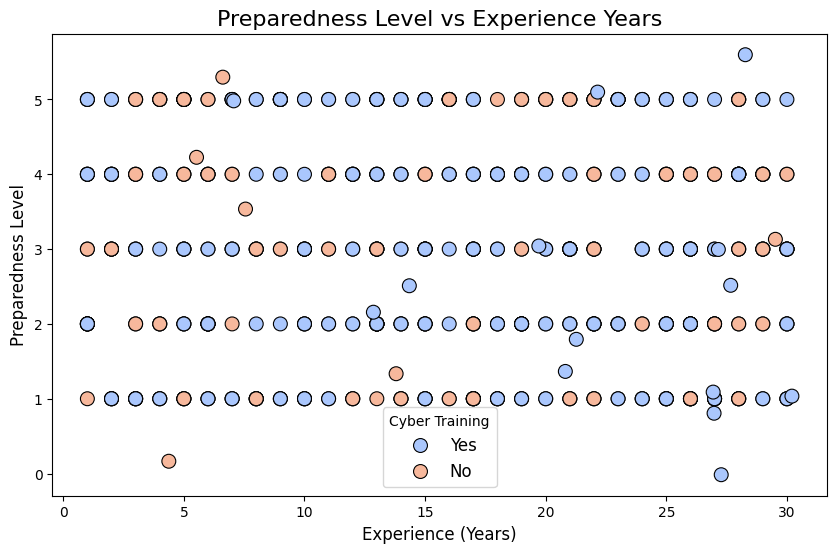

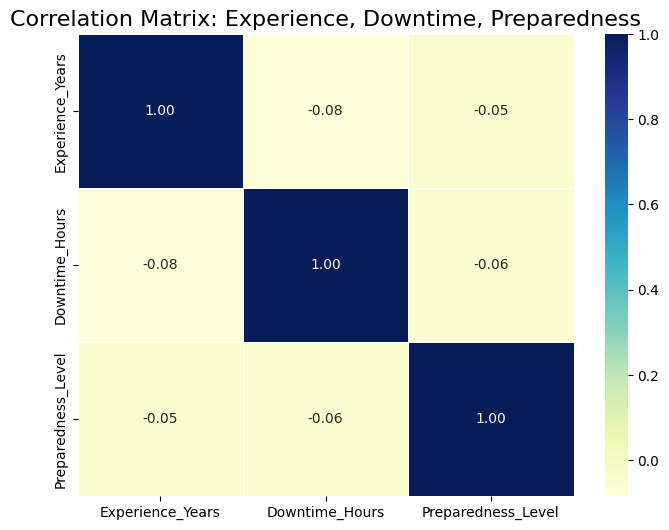

Mean Squared Error (MSE): 453.2555955903296
R-squared: 0.007958709161828614


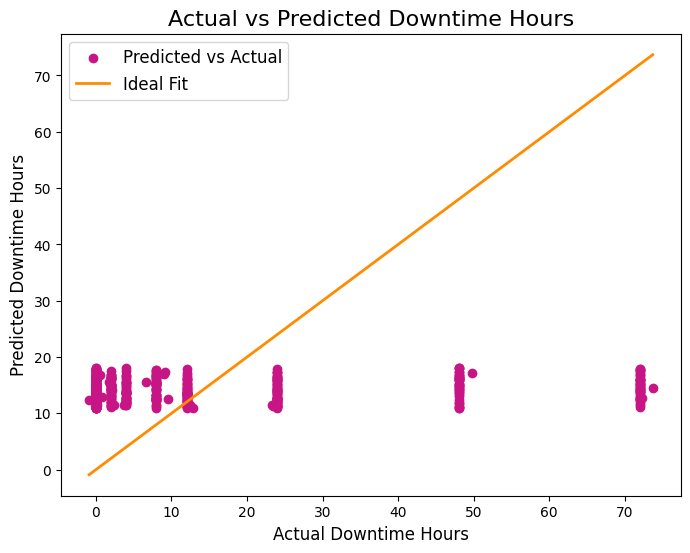

In [8]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load and Preprocess Data
# Load the dataset (Ensure to provide correct path)
data = pd.read_excel('Cybersecurity_Healthcare_Dataset.xlsx')  # Replace with your dataset path

# Check for missing values and basic information
print(data.info())

# 3. Fill missing values:
# Fill missing values for numerical columns using the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Fill missing values for categorical columns using the mode (most frequent value)
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check for missing values after filling
print(data.isnull().sum())

# 4. Convert 'Last_Training_Year' to datetime format (if it's a year column)
# If 'Last_Training_Year' represents just a year, you can convert it like this:
data['Last_Training_Year'] = pd.to_datetime(data['Last_Training_Year'], errors='coerce')

# Create 'year' and 'month' columns for time-based analysis (if necessary)
data['Training_Year'] = data['Last_Training_Year'].dt.year

# 5. Summarizing the Data
# Summary statistics of the dataset
summary = data.describe()

# Total incidents by attack type
attack_type_count = data['Attack_Type'].value_counts()

# Total downtime by department
downtime_by_dept = data.groupby('Affected_Department')['Downtime_Hours'].sum()

print("Summary of Data:")
print(summary)
print("Incidents per Attack Type:")
print(attack_type_count)
print("Total Downtime by Department:")
print(downtime_by_dept)

# 6. Exploratory Data Analysis (EDA)
# a) Visualizing the Distribution of Cyber Training in the Dataset
plt.figure(figsize=(10, 6))
training_count = data['Cyber_Training'].value_counts()
sns.barplot(x=training_count.index, y=training_count.values, palette='Blues_d')
plt.title('Distribution of Cyber Training', fontsize=16)
plt.xlabel('Cyber Training Status', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.show()

# b) Visualizing the Downtime by Attack Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack_Type', y='Downtime_Hours', data=data, palette='Set2')
plt.title('Downtime Hours by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Downtime Hours', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# c) Visualizing the Preparedness Level vs. Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Experience_Years'], y=data['Preparedness_Level'], hue=data['Cyber_Training'], palette='coolwarm', s=100, edgecolor='black')
plt.title('Preparedness Level vs Experience Years', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Preparedness Level', fontsize=12)
plt.legend(title='Cyber Training', fontsize=12)
plt.show()

# 7. Correlation Analysis
# Correlation matrix to understand relationships between numerical variables
correlation_matrix = data[['Experience_Years', 'Downtime_Hours', 'Preparedness_Level']].corr()

# Visualizing the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Experience, Downtime, Preparedness', fontsize=16)
plt.show()

# 8. Regression Analysis: Predicting Downtime Hours or Preparedness Level
# For example, predicting 'Downtime_Hours' using features like 'Experience_Years' and 'Cyber_Training'
# Select relevant columns (you can also predict 'Preparedness_Level')
X = data[['Experience_Years', 'Cyber_Training']]  # Example: Use Experience and Cyber Training
y = data['Downtime_Hours']  # Target: Downtime Hours (you can change it to 'Preparedness_Level')

# Encode categorical data (e.g., 'Cyber_Training')
X = pd.get_dummies(X, drop_first=True)

# Scaling the features (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Predicting the downtime hours
y_pred = model.predict(X_scaled)

# Model performance evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Visualize the actual vs predicted downtime hours
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='mediumvioletred', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='darkorange', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted Downtime Hours', fontsize=16)
plt.xlabel('Actual Downtime Hours', fontsize=12)
plt.ylabel('Predicted Downtime Hours', fontsize=12)
plt.legend(fontsize=12)
plt.show()

# 9. Conclusion and Recommendations
# Based on the analysis, we can conclude:
# - The experience of staff and cyber training have an impact on the preparedness level and downtime caused by cybersecurity incidents.
# - We observed that employees with more years of experience and better cyber training were associated with lower downtime.
# - The regression model gives us an indication of how well experience and training can predict downtime hours in the event of an attack.

# Future Work:
# - Use more advanced machine learning models like Random Forest or Gradient Boosting for better prediction performance.
# - Analyze the impact of different attack types on organizational downtime and preparedness.
